In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv(r"/content/Iris.csv")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Missing values/n",data.isnull().sum())

Missing values/n Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
data_encoded = pd.get_dummies(data, columns=['Species'], drop_first=True)

In [ ]:
# Selecting features (e.g., Length1, Length2, Length3) and target variable (Weight)
X = data_encoded[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data_encoded['SepalLengthCm']

In [ ]:
# Display summary statistics to understand the data better
data_encoded.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 3)
Testing set size: (30, 3)


In [ ]:
# Declare the linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 0.66823279  0.75990775 -0.68194658]
Model Intercept: 1.7398905830765843


In [ ]:
# Predict target variable for test data
y_pred = model.predict(X_test)

In [ ]:
# Display first few predictions alongside actual values for comparison
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())

   Actual  Predicted
0     6.1   6.364173
1     5.7   5.366434
2     7.7   7.152182
3     6.0   6.074431
4     6.8   6.303774


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.10222382910995534


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R²):", r2)

R-squared Score (R²): 0.8519067571325739


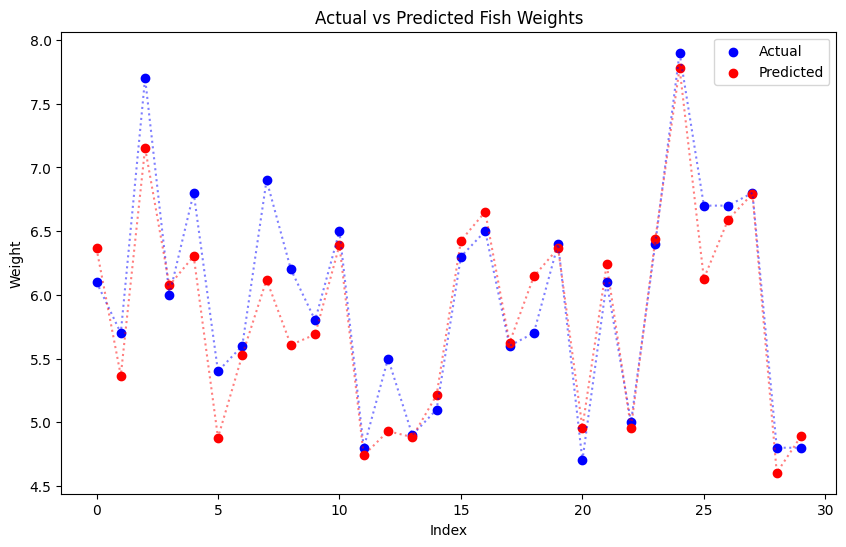

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in blue and predicted values in red with connecting lines
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.plot(range(len(y_test)), y_test, color='blue', linestyle='dotted', alpha=0.5) # Line for actual values
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dotted', alpha=0.5) # Line for predicted values

plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Actual vs Predicted Fish Weights')
plt.legend()
plt.show()

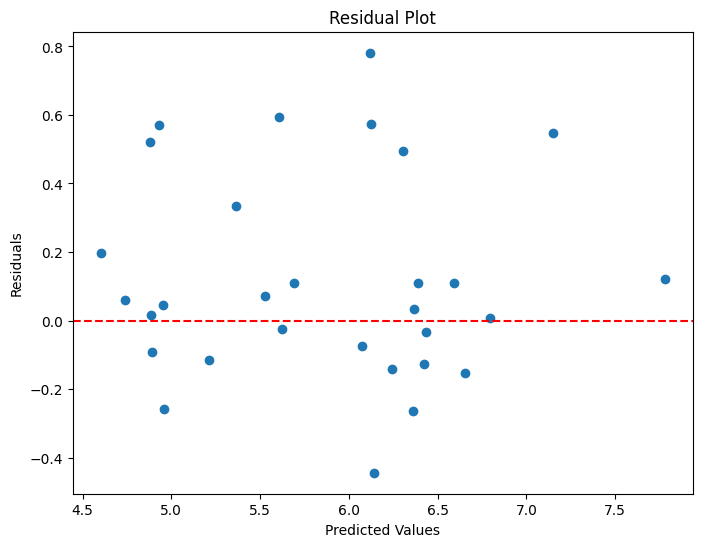

In [ ]:
# Residual plot to check errors distribution
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Removing outliers using z-score
from scipy.stats import zscore

# Select only numerical features for z-score calculation
numerical_features = data.select_dtypes(include=np.number)

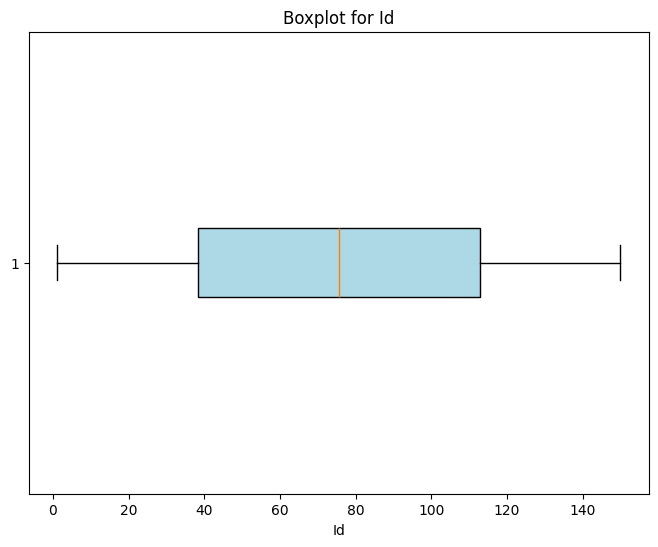

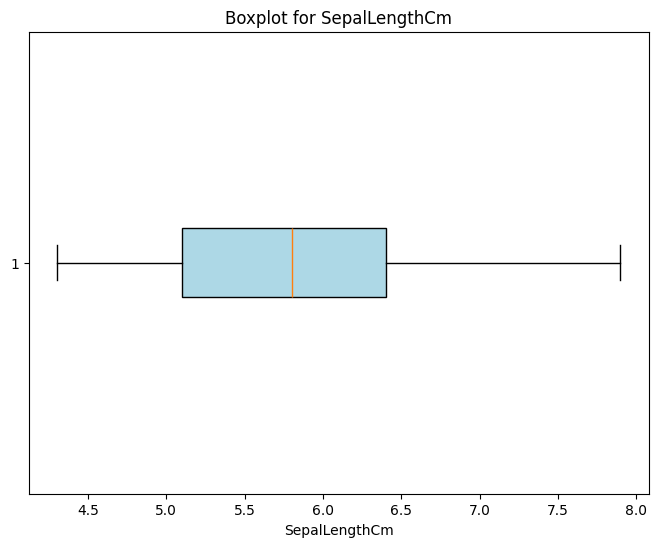

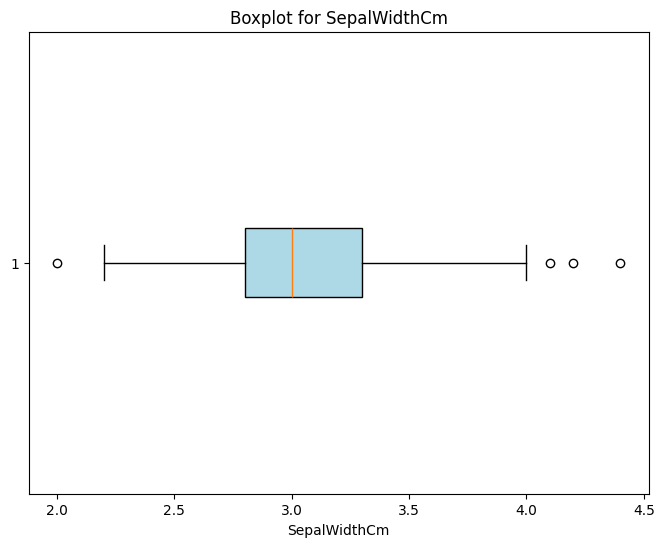

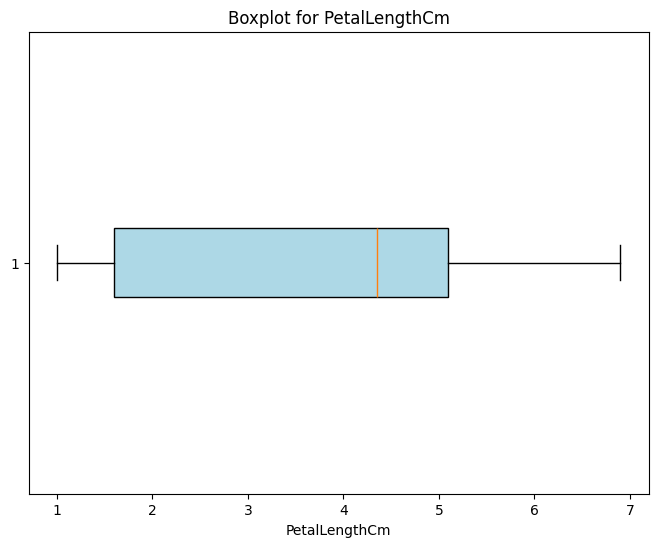

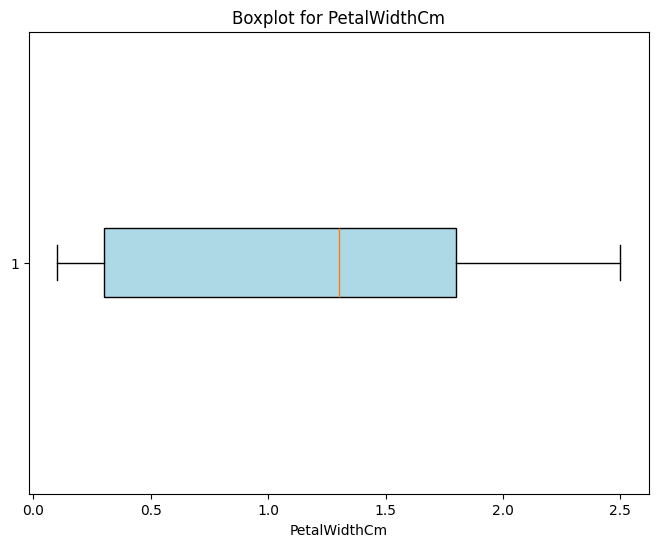

In [ ]:
# Generate boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[feature], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.show()

In [ ]:
z_scores = np.abs(zscore(numerical_features))
# Filter outliers based on z-scores for numerical features
data_cleaned = data[(z_scores < 3).all(axis=1)]

In [ ]:
# Log-transform the target variable (Weight) to reduce skewness

# Create a deep copy to avoid SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Replace zero or negative weights with a small constant (e.g., 0.1)
data_cleaned.loc[:, 'SepalLengthCm'] = data_cleaned['SepalLengthCm'].apply(lambda x: x if x > 0 else 0.1)

# Apply log transformation
data_cleaned.loc[:, 'SepalLengthCm'] = np.log(data_cleaned['SepalLengthCm'])

# Verify the transformation
print(data_cleaned['SepalLengthCm'].head())

0    1.629241
1    1.589235
2    1.547563
3    1.526056
4    1.609438
Name: SepalLengthCm, dtype: float64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 9)
Testing set size: (30, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Lasso Regression with increased max_iter and adjusted alpha
lasso_model = Lasso(alpha=1.0, max_iter=5000)
lasso_model.fit(X_train_scaled, y_train)


Lasso(max_iter=5000)

In [ ]:
# Predict on test data
y_pred = lasso_model.predict(X_test_scaled)

# Cap predictions to avoid overflow in np.exp
y_pred_capped = np.clip(y_pred, a_min=None, a_max=100)  # Cap at 100

In [ ]:
# Step 5: Apply exponential transformation for capped predictions
y_pred_exp = np.exp(y_pred_capped)
y_test_exp = np.exp(np.clip(y_test, a_min=None, a_max=100))

In [ ]:
# Display first few predictions alongside actual values for comparison
comparison = pd.DataFrame({'Actual': y_test_exp.values, 'Predicted': y_pred_exp})
comparison.head()

,Actual,Predicted
0,445.857770,333.341226
1,298.867401,333.341226
2,2208.347992,333.341226
3,403.428793,333.341226
4,897.847292,333.341226


In [ ]:
# Evaluate model performance on log-transformed scale
mse_log = mean_squared_error(y_test, y_pred)
r2_log = r2_score(y_test, y_pred)

print("Mean Squared Error (Log Scale):", mse_log)
print("R-squared Score (Log Scale):", r2_log)

Mean Squared Error (Log Scale): 0.719450694444445
R-squared Score (Log Scale): -0.04227935258515281


Since the first version of the model had much lower error and a strong R², it's clear that the regularization technique or log transformation reduced model performance instead of improving it. Sticking with the first approach (or fine-tuning regularization parameters) would be the better choice.
